In [1]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math
# Defining some variables



# Defining the Hamiltonian XY model
def Hamiltonian2D(J, L):
    Hamiltonian2D = -J*np.sum(np.cos(L[::] - np.roll(L, 1, axis=0))
                              +np.cos(L[::] - np.roll(L, -1, axis=0))
                              +np.cos(L[::] - np.roll(L, 1, axis=1))
                              +np.cos(L[::] - np.roll(L, -1, axis=1)))
    return Hamiltonian2D/2


# Defining the artifical Hamiltonian XY model
def Hamiltonian2D_art(J, L, P, beta):
    n = np.shape(L)[0]
    Hamiltonian2D_art = sum(sum(P**2))/2 + beta*Hamiltonian2D(J, L)
    return Hamiltonian2D_art


# Defining the equations of motion
def P_dot_i_2D(J, L,beta):
    P_dot_i_2D = -J*np.sum(np.sin(L[::] - np.roll(L, 1, axis=0))
                              +np.sin(L[::] - np.roll(L, -1, axis=0))
                              +np.sin(L[::] - np.roll(L, 1, axis=1))
                              +np.sin(L[::] - np.roll(L, -1, axis=1)))
    return P_dot_i_2D*beta



def phi_dot(P):   # confirm
    return P
            

# Leapfrog integrator
def leapfrog_2D(N_md, p_0,J, L, beta): 
    epsilon = 1/N_md
    p = p_0
    L_new = L
    L_new += phi_dot(p)*epsilon/2
    L_new = abs(L_new%(2*np.pi))
    for i in range(N_md-1):
        p += P_dot_i_2D(J, L,beta)*epsilon
        L_new += phi_dot(p)*epsilon
        L_new = abs(L_new%(2*np.pi))
    
    p +=  P_dot_i_2D(J, L,beta)*epsilon/2
    L_new -= phi_dot(p)*epsilon/2
    L_new = abs(L_new%(2*np.pi))
    return p, L_new

# To plot fractional diference
def fractional_diff_plot(N_md, p_0, J,L,beta):
    diff = []
    range_1 =[10*i for i in range(10,100,5)]
    p_0 = np.random.normal(size=(N,N))
    for N_md in range_1:

        arr = leapfrog_2D(N_md, p_0, J,L,beta)
        p_f = arr[0]          # We need final values of p_f and phi_f to calculate H_f
        Lat_ev = arr[1]
        H_f = Hamiltonian2D_art(J, Lat_ev, p_f, beta)
        H_0 = Hamiltonian2D_art(J, L, p_0, beta)

    # The following is the quantity we want on y-axis
        diff.append(abs((H_f-H_0)/H_0)) 


    print("ini=",H_0)
    print("final=",H_f)
    ini= 10662.036426656732
    final= 10671.118479150738
    plt.figure(figsize=(12,10))
    plt.xlabel('Number of Leapfrog Steps (N_md)')
    plt.ylabel('Fractional Difference in Energy')
    plt.title('Convergence Plot')
    plt.grid()
    plt.plot(range_1, diff,'.')
    plt.show()



ini= 4.4145227361188315
final= 13.577042837522633


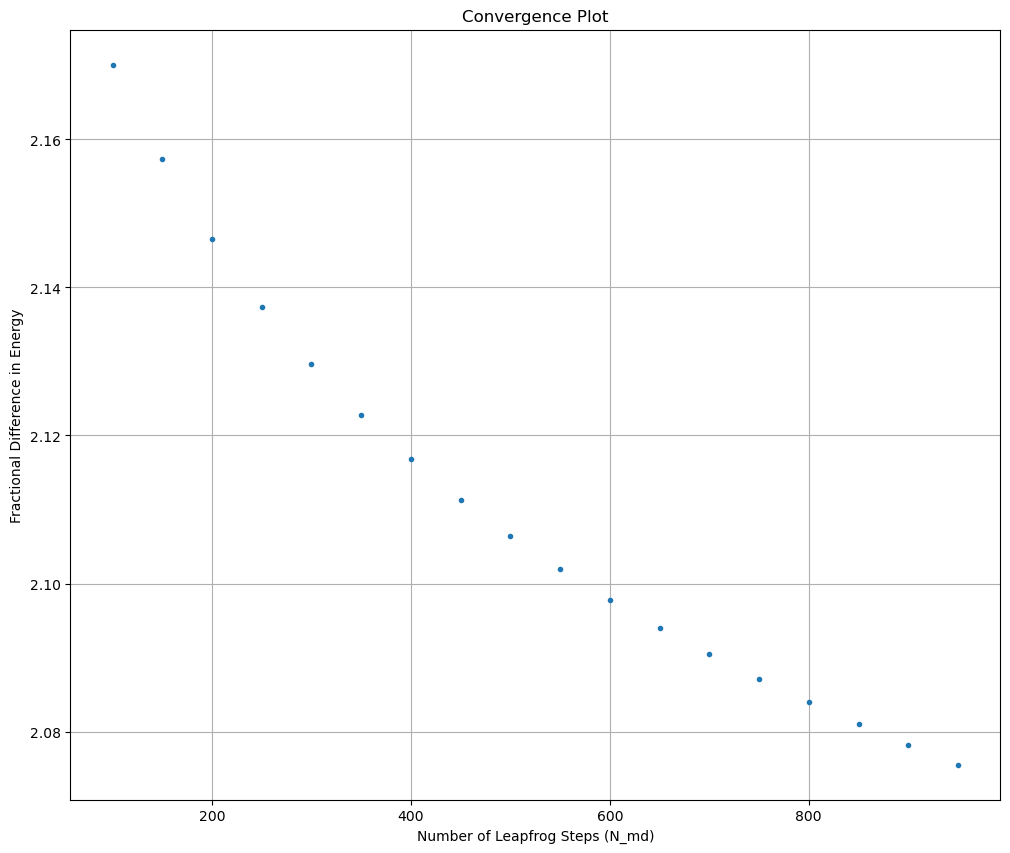

None


In [2]:
    
N = 5
L =  np.array([[2*np.pi*np.random.uniform() for x in range(N)] for y in range(N)]) # ask
N_md = 4
p_0 = np.random.normal(size=(N,N))
# p_0 = 1
J=1
beta=1

print(fractional_diff_plot(N_md, p_0, J,L,beta))

In [3]:

def markov_chain(L_i,N_cfg,N_md,beta,J,elem_num):
    chain = []
    chain.append(L_i)
    for i in range(N_cfg):
        # Random sample
        p_hmc = np.random.normal(size=(N,N))
        new = leapfrog_2D(N_md,p_hmc, J, chain[-1],beta) # Integrating leapfrog algorithm
        prob = np.exp(Hamiltonian2D_art(J,chain[-1],p_hmc,beta)-Hamiltonian2D_art(J,new[1],new[0],beta))
#  Given probability distribution function defined above
        if prob > np.random.uniform(0,1):   # Accept/reject
            chain.append(new[1])  
        else:                           
            chain.append(chain[-1]) 
    return chain[-elem_num:]


def variables(L_i, N_cfg, N_md, J, beta,elem_num):
    chain = markov_chain(L_i,N_cfg,N_md,beta,J,elem_num)
    m = 0.0
    E = 0.0
    for i in chain:
        m += np.sum(i)
        E += Hamiltonian2D(J,i)  
    m = m/N*N
    E = E/N*N

        
    return m,E



Text(0.5, 1.0, 'm as a f(T) for N = 5')

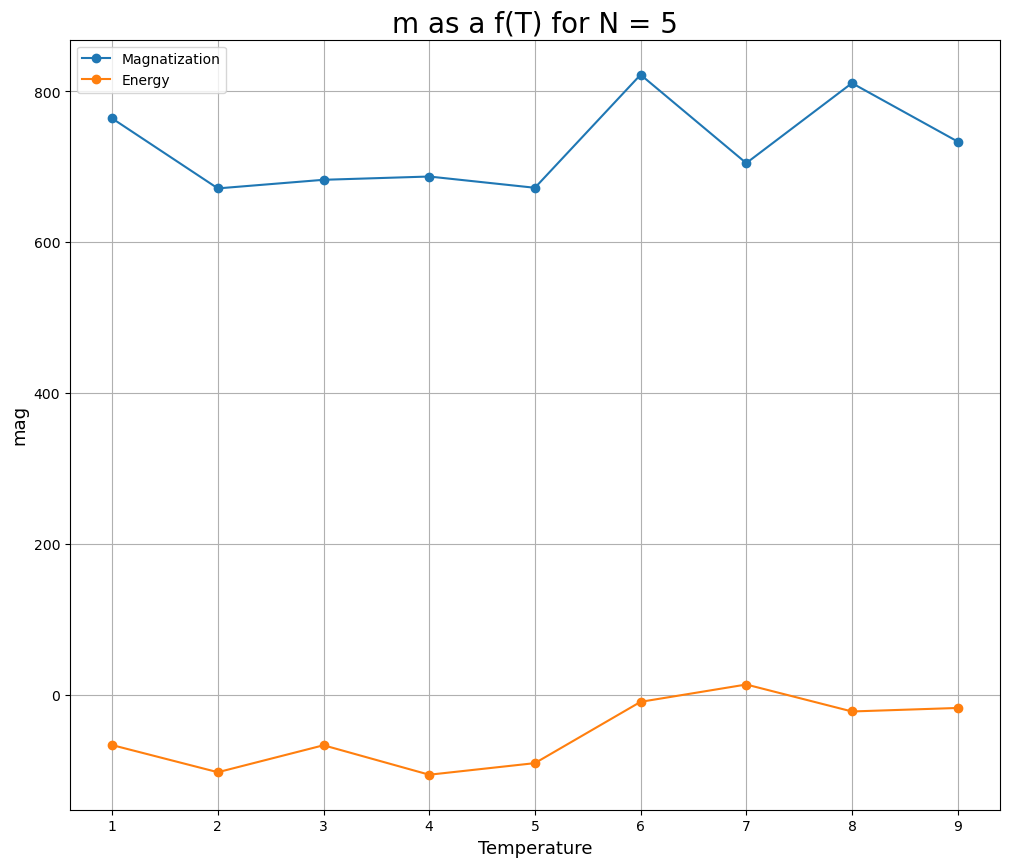

In [13]:
N_cfg = 20000
beta_range = np.arange(1,10,1) 
elem_num = 10
# beta = 1 / kb * T
# L_i =  np.array([[2*np.pi*np.random.uniform() for x in range(N)] for y in range(N)]) #not sure, should be the random 
# # sample but will we define it like this? if we do this then it will be the same as L but shouldnt be same right?


mag_5 = [variables(L, N_cfg, N_md, J, 1/i, elem_num) for i in beta_range]

plt.figure(figsize = (12,10))
plt.plot(beta_range, mag_5, 'o-',label=("Magnatization","Energy"))
plt.grid()
plt.xlabel("Temperature", fontsize = 13)
plt.ylabel("mag", fontsize = 13)
plt.legend()
plt.title("m as a f(T) for N = 5", fontsize = 20 )